<a href="https://colab.research.google.com/github/Whyawww/mbg-twitter-indobert-large/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Sastrawi transformers torch scikit-learn pandas seaborn matplotlib wordcloud accelerate -q

In [2]:
import pandas as pd
import string
dataset = pd.read_csv('/content/dataset.csv')
dataset.head(5)


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1994694141864022427,Sat Nov 29 23:58:19 +0000 2025,0,@txtdrpemerintah Kalau sudah seperti ini progr...,1994918882046611775,NaN,txtdrpemerintah,in,NaN,0,0,0,https://x.com/undefined/status/199491888204661...,417507715,NaN
1,1994918541171339293,Sat Nov 29 23:56:58 +0000 2025,7,Kepikiran yang kelola MBG sebanyak 41 Unit htt...,1994918541171339293,https://pbs.twimg.com/media/G69fyTTbwAAsG8d.jpg,NaN,in,NaN,0,1,7,https://x.com/undefined/status/199491854117133...,1577484041317912577,NaN
2,1994739131906392560,Sat Nov 29 23:52:48 +0000 2025,1,@idextratime @marca MBG nyasar ke real madrid,1994917490061918565,NaN,idextratime,in,NaN,0,0,0,https://x.com/undefined/status/199491749006191...,1912565393769787395,NaN
3,1994917388803084581,Sat Nov 29 23:52:23 +0000 2025,0,Guru udah ditambahin tugas distribusi mbg dita...,1994917388803084581,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491738880308...,323317480,NaN
4,1994270727407583322,Sat Nov 29 23:51:51 +0000 2025,0,@Giiselje Makan tuh MBG beracun. Malah bikin m...,1994917254841209149,NaN,Giiselje,in,NaN,0,0,0,https://x.com/undefined/status/199491725484120...,286968494,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      4874 non-null   int64  
 1   created_at               4874 non-null   object 
 2   favorite_count           4874 non-null   int64  
 3   full_text                4874 non-null   object 
 4   id_str                   4874 non-null   int64  
 5   image_url                2094 non-null   object 
 6   in_reply_to_screen_name  1706 non-null   object 
 7   lang                     4874 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              4874 non-null   int64  
 10  reply_count              4874 non-null   int64  
 11  retweet_count            4874 non-null   int64  
 12  tweet_url                4874 non-null   object 
 13  user_id_str              4874 non-null   int64  
 14  username                

In [4]:
dataset.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,2780
in_reply_to_screen_name,3168
lang,0
location,4874
quote_count,0


# EDA

In [5]:
import pandas as pd

dataset = pd.read_csv('/content/dataset.csv')

KOLOM_WAKTU = 'created_at'
KOLOM_TEKS = 'full_text'

duplikat = dataset.duplicated(subset=[KOLOM_TEKS]).sum()
dataset = dataset.drop_duplicates(subset=[KOLOM_TEKS]).copy()

if KOLOM_WAKTU in dataset.columns:
    dataset[KOLOM_WAKTU] = pd.to_datetime(
        dataset[KOLOM_WAKTU],
        format='%a %b %d %H:%M:%S %z %Y',
        errors='coerce'
    )
    waktu_terbaru = dataset[KOLOM_WAKTU].max()
    waktu_terlama = dataset[KOLOM_WAKTU].min()
else:
    waktu_terbaru = "N/A"
    waktu_terlama = "N/A"

if KOLOM_TEKS in dataset.columns:
    jumlah_kata = dataset[KOLOM_TEKS].astype(str).apply(lambda x: len(x.split()))
    Jumlah_kurang_4_kata = (jumlah_kata < 4).sum()
else:
    Jumlah_kurang_4_kata = 0

print("INFORMASI RINGKAS DATAFRAME")
print(f"Jumlah kolom                      : {dataset.shape[1]}")
print(f"Jumlah baris (setelah drop dup)   : {dataset.shape[0]}")
print(f"Jumlah Duplikasi Teks (Dihapus)   : {duplikat}")
print(f"Jumlah Tweet < 4 Kata             : {Jumlah_kurang_4_kata}")

if KOLOM_WAKTU in dataset.columns and pd.api.types.is_datetime64_any_dtype(dataset[KOLOM_WAKTU]):
    if pd.notnull(waktu_terlama) and pd.notnull(waktu_terbaru):
        print(f"Rentang Waktu Tweet               : {waktu_terlama.date()} s.d. {waktu_terbaru.date()}")
else:
    print(f"Rentang Waktu Tweet               : {waktu_terlama} s.d. {waktu_terbaru}")

print(f"Nama Kolom: {', '.join(dataset.columns)}")

INFORMASI RINGKAS DATAFRAME
Jumlah kolom                      : 15
Jumlah baris (setelah drop dup)   : 4138
Jumlah Duplikasi Teks (Dihapus)   : 736
Jumlah Tweet < 4 Kata             : 36
Rentang Waktu Tweet               : 2025-09-28 s.d. 2025-11-29
Nama Kolom: conversation_id_str, created_at, favorite_count, full_text, id_str, image_url, in_reply_to_screen_name, lang, location, quote_count, reply_count, retweet_count, tweet_url, user_id_str, username


Tahap EDA awal ini memberikan gambaran umum mengenai kondisi dataset mentah sebelum diproses lebih lanjut. Berdasarkan output informasi ringkas di atas, terdapat beberapa tindakan dan temuan krusial:

1. Penanganan Duplikasi Data: Telah ditemukan dan dihapus sebanyak 736 tweet duplikat (dihitung murni berdasarkan kesamaan isi teks). Pembersihan ini sangat esensial karena tweet yang berulang (umumnya akibat retweet massal atau akun bot) dapat menyebabkan model IndoBERT mengalami overfitting—yaitu kondisi di mana model hanya "menghafal" data yang sering muncul alih-alih mempelajari pola sentimen bahasanya. Setelah dibersihkan, tersisa 4.138 baris data unik.
2. Identifikasi Teks Minim Konteks: Ditemukan 36 tweet yang panjangnya kurang dari 4 kata. Teks yang sangat pendek biasanya miskin konteks (contoh: hanya berisi tautan, sebutan akun, atau satu kata tak bermakna), sehingga nantinya perlu difilter agar tidak menjadi noise pada model.

3. Standarisasi Rentang Waktu: Parsing waktu telah berhasil dilakukan, menunjukkan data diambil dalam rentang waktu 28 September 2025 hingga 29 November 2025. Informasi ini relevan untuk melacak tren sentimen publik terhadap program "Makan Bergizi Gratis" dalam periode waktu tersebut.

### Distribusi Teks (EDA)

=== Distribusi Panjang Karakter Teks Dan Non-Alfanumerik ===


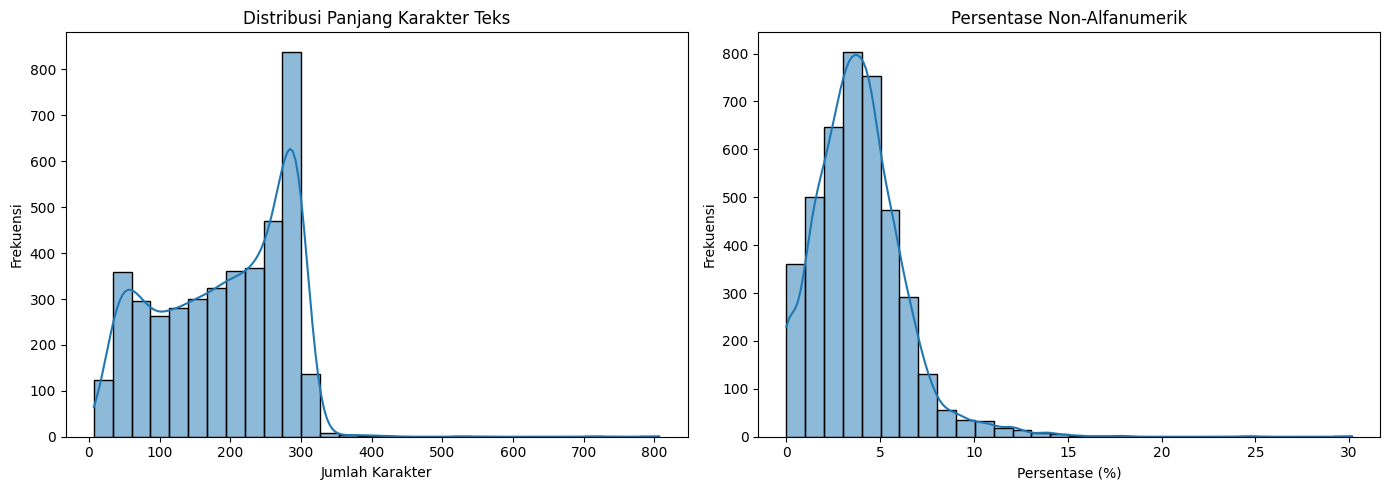

In [6]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

dataset['panjang_karakter_teks'] = dataset[KOLOM_TEKS].astype(str).apply(len)

def hitung_persen_non_alfanumerik(teks):
  if not teks or teks.strip() == "":
    return 0
  total_karakter = len(teks)
  non_alnum = len(re.findall(r'[^a-zA-Z0-9\s]',teks))
  return (non_alnum / total_karakter) * 100

dataset['persen_non_alfanumerik'] = dataset[KOLOM_TEKS].apply(hitung_persen_non_alfanumerik)

print("=== Distribusi Panjang Karakter Teks Dan Non-Alfanumerik ===")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(dataset['panjang_karakter_teks'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribusi Panjang Karakter Teks')
axes[0].set_xlabel('Jumlah Karakter')
axes[0].set_ylabel('Frekuensi')

sns.histplot(dataset['persen_non_alfanumerik'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Persentase Non-Alfanumerik')
axes[1].set_xlabel('Persentase (%)')
axes[1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Pola Waktu dan Kata Umum (EDA)

/tmp/ipython-input-870016923.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tweet_per_date = dataset[KOLOM_WAKTU].dt.to_period('M').value_counts().sort_index()


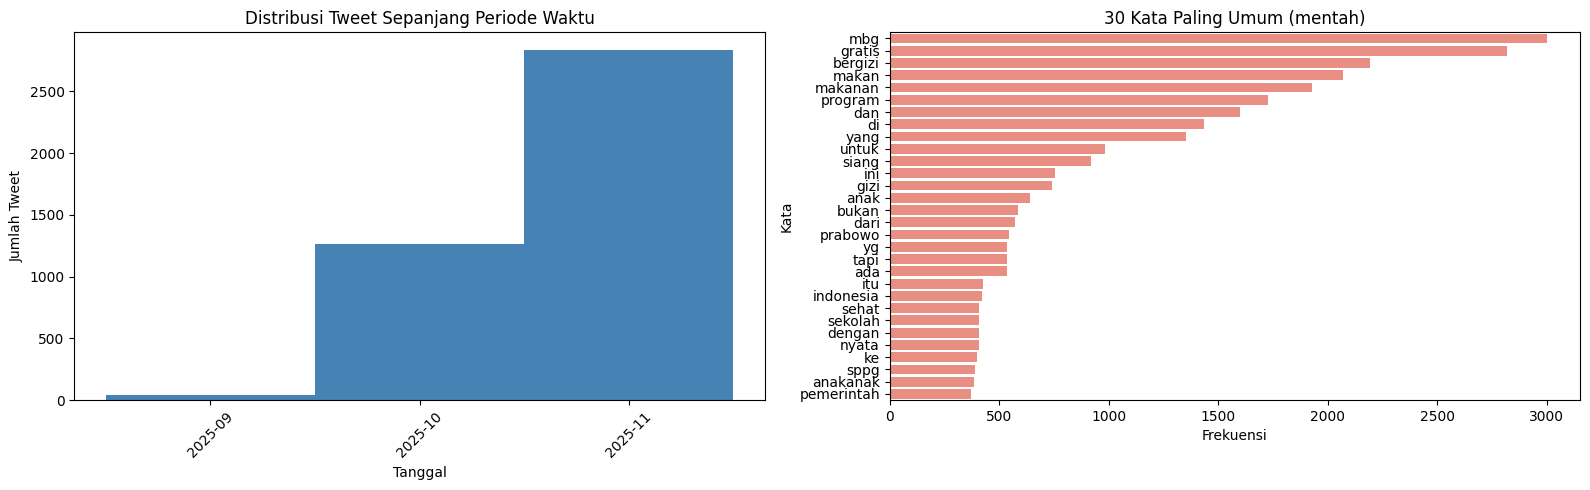

In [7]:
from collections import Counter
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

semua_teks = ' '.join(dataset[KOLOM_TEKS].astype(str).tolist()).lower()
semua_teks = semua_teks.translate(str.maketrans('','',string.punctuation))
kata_list = semua_teks.split()
frekuensi_kata = Counter(kata_list)
kata_teratas = frekuensi_kata.most_common(30)
kata, jumlah = zip(*kata_teratas)

if KOLOM_WAKTU in dataset.columns:
    if not pd.api.types.is_datetime64_any_dtype(dataset[KOLOM_WAKTU]):
        dataset[KOLOM_WAKTU] = pd.to_datetime(dataset[KOLOM_WAKTU], errors='coerce')
    tweet_per_date = dataset[KOLOM_WAKTU].dt.to_period('M').value_counts().sort_index()
else:
    tweet_per_date = pd.Series()


fig, axes = plt.subplots(1, 2, figsize=(16, 5))

if not tweet_per_date.empty:
    axes[0].bar(tweet_per_date.index.astype(str), tweet_per_date.values, color='steelblue', width=1)
    axes[0].set_title('Distribusi Tweet Sepanjang Periode Waktu')
    axes[0].set_xlabel('Tanggal')
    axes[0].set_ylabel('Jumlah Tweet')
    axes[0].tick_params(axis='x', rotation=45)
else:
    axes[0].set_title('Distribusi Tweet Sepanjang Periode Waktu (Data Tidak Tersedia)')
    axes[0].text(0.5, 0.5, 'Tidak ada data untuk ditampilkan', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

sns.barplot(x=list(jumlah), y=list(kata), ax=axes[1], color='salmon')
axes[1].set_title('30 Kata Paling Umum (mentah)')
axes[1].set_xlabel('Frekuensi')
axes[1].set_ylabel('Kata')

plt.tight_layout()
plt.show()

### Hapus duplikasi dan sentimen dibawah < 4 kata

In [8]:
print(f"Jumlah data AWAL: {len(dataset)}")
print(f"Duplikasi: {dataset.duplicated().sum()}")
jumlah_kata = dataset[KOLOM_TEKS].astype(str).apply(lambda x: len(x.split()))
print(f"Tweet < 4 kata: {(jumlah_kata < 4).sum()}")
print("-" * 50)

dataset = dataset.drop_duplicates()
print(f"Setelah hapus duplikasi: {len(dataset)} baris")

dataset = dataset[dataset[KOLOM_TEKS].astype(str).apply(lambda x: len(x.split())) >= 4]
print(f"Setelah hapus tweet pendek: {len(dataset)} baris")

print("-" * 50)
print(f"Total data yang dihapus: {4874 - len(dataset)}")
print(f"Dataset BERSIH: {len(dataset)} baris")

Jumlah data AWAL: 4138
Duplikasi: 0
Tweet < 4 kata: 36
--------------------------------------------------
Setelah hapus duplikasi: 4138 baris
Setelah hapus tweet pendek: 4102 baris
--------------------------------------------------
Total data yang dihapus: 772
Dataset BERSIH: 4102 baris


# Preprocessing

### Case folding & Cleaning

In [9]:
import re

def clean_twitter_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'\#', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

print("Mulai membersihkan teks...")
dataset['cleaned_text'] = dataset['full_text'].apply(clean_twitter_text)

dataset['word_count'] = dataset['cleaned_text'].apply(lambda x: len(str(x).split()))

dataset = dataset[dataset['word_count'] >= 4].copy()

dataset = dataset.drop_duplicates(subset=['cleaned_text']).copy()

dataset = dataset.drop(columns=['word_count'])

print("Pembersihan selesai!")
print(f"Jumlah baris bersih yang siap masuk ke tahap Normalisasi: {dataset.shape[0]}")

dataset[['full_text', 'cleaned_text']].head()

Mulai membersihkan teks...
Pembersihan selesai!
Jumlah baris bersih yang siap masuk ke tahap Normalisasi: 3711


,full_text,cleaned_text
0,@txtdrpemerintah Kalau sudah seperti ini progr...,kalau sudah seperti ini program mbg sudah laya...
1,Kepikiran yang kelola MBG sebanyak 41 Unit htt...,kepikiran yang kelola mbg sebanyak unit
2,@idextratime @marca MBG nyasar ke real madrid,mbg nyasar ke real madrid
3,Guru udah ditambahin tugas distribusi mbg dita...,guru udah ditambahin tugas distribusi mbg dita...
4,@Giiselje Makan tuh MBG beracun. Malah bikin m...,makan tuh mbg beracun malah bikin masalah lagi


Pada tahap ini, jumlah dataset menyusut dari 4.138 menjadi 3.711 baris data bersih. Hal ini adalah proses reduksi noise yang sangat krusial sebelum data dimasukkan ke dalam model IndoBERT. Penurunan jumlah data ini disebabkan oleh:
1. Pembuangan Kalimat Tanpa Konteks (Filter < 4 Kata): Di Twitter, sangat banyak cuitan yang hanya berisi tautan gambar/video atau sekadar me-mention akun lain. Setelah tautan dan mention dihapus, teks tersebut menjadi kosong atau tersisa kurang dari 4 kata. Teks ini dihapus karena tidak memiliki konteks sentimen yang bisa dipelajari oleh model.
2. Pembersihan Duplikat Pasca-Cleaning: Seringkali terdapat tweet yang inti pesannya sama persis, namun berbeda pada akun yang di-mention. Setelah fitur mention dibuang, teks-teks tersebut akan terdeteksi sebagai duplikat dan dieliminasi agar model tidak mengalami overfitting (menghafal data) saat proses training.
3. Standarisasi Karakter: Seluruh huruf telah diubah menjadi huruf kecil (case folding) dan karakter khusus, emoji, serta angka telah dihilangkan. Hal ini mencegah tokenizer IndoBERT memproses "token sampah" sehingga kapasitas memori model dapat difokuskan murni pada kata-kata yang mengandung nilai sentimen.

### Normalisasi

In [10]:
import re

slang_dict = {
    "mbg": "makan bergizi gratis", "yg": "yang", "lbh": "lebih", "ga": "tidak",
    "sngt": "sangat", "medsos": "media sosial", "lngs": "langsung", "bp": "bapak",
    "gak": "tidak", "tdk": "tidak", "tdak": "tidak", "bkn": "bukan", "mkn": "makan",
    "utk": "untuk", "dgn": "dengan", "emg": "memang", "najong": "najis", "jd": "jadi",
    "sdh": "sudah", "udah": "sudah", "blm": "belum", "nasgor": "nasi goreng",
    "kpd": "kepada", "spy": "supaya", "bnr": "benar", "bner": "benar", "hrs": "harus",
    "urgent": "mendesak", "stop": "berhenti", "bgt": "banget", "ckp": "cukup",
    "kalo": "kalau", "kl": "kalau", "duit": "uang", "gue": "aku", "gw": "aku",
    "ngasal": "sembarangan", "sj": "saja", "sm": "sama", "aja": "saja", "tp": "tapi",
    "krn": "karena", "bs": "bisa", "org": "orang", "skrg": "sekarang", "kmrn": "kemarin",
    "donk": "dong", "bngt": "banget", "gmn": "bagaimana", "dmn": "dimana", "knp": "kenapa", "klo": "kalau",
    "prabowo": "presiden", "gibran": "wakil presiden"
}

def normalize_text(text):
    text = str(text)

    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    words = text.split()
    normalized_words = [slang_dict.get(w, w) for w in words]

    return " ".join(normalized_words).strip()

print("Memulai proses normalisasi slang...")
dataset['Normalisasi'] = dataset['cleaned_text'].apply(normalize_text)

print("Normalisasi selesai!")
dataset[['cleaned_text', 'Normalisasi']].head(10)

Memulai proses normalisasi slang...
Normalisasi selesai!


,cleaned_text,Normalisasi
0,kalau sudah seperti ini program mbg sudah laya...,kalau sudah seperti ini program makan bergizi ...
1,kepikiran yang kelola mbg sebanyak unit,kepikiran yang kelola makan bergizi gratis seb...
2,mbg nyasar ke real madrid,makan bergizi gratis nyasar ke real madrid
3,guru udah ditambahin tugas distribusi mbg dita...,guru sudah ditambahin tugas distribusi makan b...
4,makan tuh mbg beracun malah bikin masalah lagi,makan tuh makan bergizi gratis beracun malah b...
5,buu yang jelas mbg banyak kasus keracunan aj g...,buu yang jelas makan bergizi gratis banyak kas...
6,anggaran itu dikaji bersama kementerian dan di...,anggaran itu dikaji bersama kementerian dan di...
7,t perhari itu lbh urgent untuk penanganan musi...,t perhari itu lebih mendesak untuk penanganan ...
8,mbg kan diajukan bukan tiba tiba ada wkkwk,makan bergizi gratis kan diajukan bukan tiba t...
9,org indon gampang lupa klo bkn momen gni diing...,orang indon gampang lupa kalau bukan momen gni...


# Labeling Sentimen

Memulai proses labeling lexicon
Labeling Selesai!

Sebaran Sentimen:
label_sentimen
Negatif (0)    1389
Positif (2)    1253
Netral (1)     1069
Name: count, dtype: int64


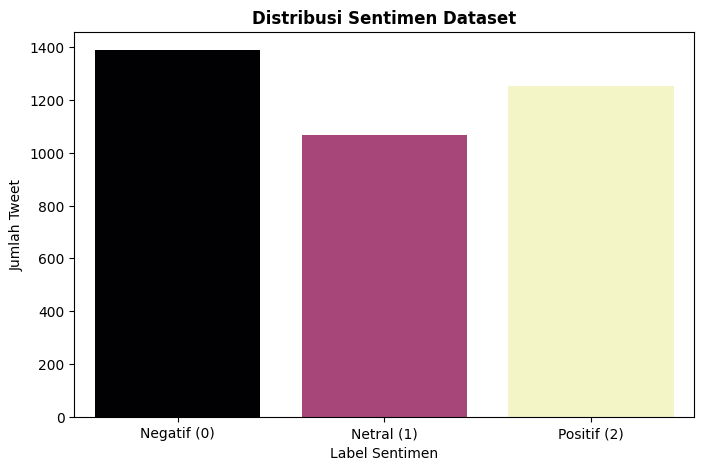

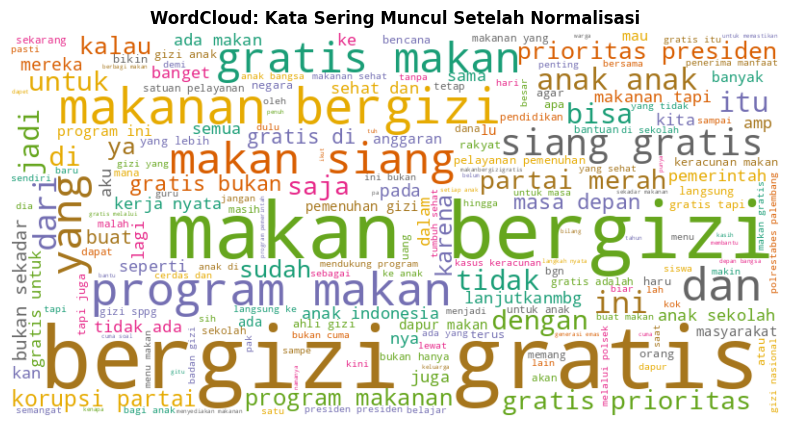

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

pos_list = set([
    'setuju', 'dukung', 'mendukung', 'mantap', 'bagus', 'salut', 'baik', 'sehat', 'nutrisi', 'bermanfaat', 'manfaat', 'apresiasi', 'dibutuhkan', 'komitmen', 'pembangunan', 'nasional',
    'nyata', 'terimakasih', 'bersyukur', 'bantu', 'lanjutkan', 'alhamdulillah', 'keren', 'harapan', 'meningkatkan', 'menggerakkan', 'mendorong', 'perputaran', 'tercipta', 'kuat',
    'peduli', 'higienis', 'kesehatan', 'semangat', 'optimis', 'enak', 'layak', 'aman', 'lancar', 'terserap', 'perekonomian', 'kolaborasi', 'penguatan', 'sinergi',
    'perlu', 'berkualitas', 'terjamin', 'membantu', 'pertumbuhan', 'perbaikan', 'solusi', 'cerdas', 'maju', 'penuhi', 'pondasi', 'fondasi', 'investasi', 'dorong', 'positif', 'produktif',
    'melawan', 'mencetak', 'memperkuat', 'kepedulian', 'cerah', 'keadilan', 'safety',  'cegah', 'kemandirian', 'tingkatkan'
])

neg_list = set([
    'keracunan', 'racun', 'beracun', 'korupsi', 'korup', 'tidak', 'batal', 'mahal', 'tolak', 'henti', 'koruptor', 'merusak',
    'dihentikan', 'sakit', 'hentikan', 'dosa', 'bodoh', 'goblok', 'bohong', 'gagal', 'hutang', 'utang', 'naik', 'babi', 'ternak',
    'penyalahgunaan', 'basi', 'busuk', 'kotor', 'meninggal', 'buzzer', 'bencana', 'maling', 'hancur', 'melanggar', 'penjara', 'darurat',
    'kecewa', 'ribet', 'masalah', 'najis', 'beban', 'buruk', 'rusuh', 'nyawa', 'mati', 'tutup', 'anjing', 'subsidi', 'hapus', 'kasus',
    'anggaran', 'gegara', 'stop', 'bau', 'alihkan', 'mending', 'prioritas', 'korban', 'gajadi', 'gabaik', 'rugi', 'boncos', 'kering', 'dongo',
    'mangkas', 'gila', 'buang', 'musibah', 'sampah', 'gaguna', 'tolol', 'muntaber', 'nyusahin', 'tai', 'kntol', 'pelanggar', 'gacoan', 'voucher', 'shopeefood', 'diskon', 'gofood',
    'ajg', 'anj', 'pangkas', 'daripada', 'ketimbang', 'sia-sia', 'pencitraan', 'gimmick', 'ngalihin', 'duitnya', 'gengsi', 'ngeracunin', 'grabfood','sale',
    'sengaja', 'kesedot', 'nyasar', 'terlalu', 'lamban', 'investigasi', 'untung', "obses", 'protes', 'senjata', 'keras', 'keraz', 'nirempati', 'dibutakan',
    'stres', 'stress', 'habis', 'ngawur', 'kosong', 'nepotisme', 'gilanya', 'sawit', 'asu', "ilegal", 'korupnya', 'membunuh', 'penipuan', 'bunuh', 'membunuhmu'
])

strong_neg = ['dihentikan', 'alihkan', 'mending', 'berhenti', 'keracunan', 'najis', 'korupsi', 'kesedot', 'nyasar', 'tolol', 'gimmick', 'pencitraan', 'anggaran']
strong_pos = ['terima kasih', 'alhamdulillah', 'keren', 'bermanfaat', 'bukti nyata']

def final_labeling(text):
    if not isinstance(text, str):
        return 1

    score = 0
    text_lower = text.lower()
    words = text_lower.split()

    for s_neg in strong_neg:
        if s_neg in text_lower:
            score -= 2

    for word in words:
        if word in pos_list:
            score += 1
        elif word in neg_list:
            score -= 1

    for s_pos in strong_pos:
        if s_pos in text_lower:
            score += 2

    if score > 0:
        return 2
    elif score < 0:
        return 0
    else:
        return 1

print("Memulai proses labeling lexicon")
dataset['label_sentimen'] = dataset['Normalisasi'].apply(final_labeling)
print("Labeling Selesai!")

print("\nSebaran Sentimen:")
distribusi = dataset['label_sentimen'].value_counts().rename({0: 'Negatif (0)', 1: 'Netral (1)', 2: 'Positif (2)'})
print(distribusi)

plt.figure(figsize=(8, 5))
sns.countplot(x='label_sentimen', data=dataset, hue='label_sentimen', palette='magma', legend=False)
plt.title('Distribusi Sentimen Dataset', fontweight='bold')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Tweet')
plt.xticks(ticks=[0, 1, 2], labels=['Negatif (0)', 'Netral (1)', 'Positif (2)'])
plt.show()

all_text = ' '.join(dataset['Normalisasi'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud: Kata Sering Muncul Setelah Normalisasi', fontweight='bold')
plt.show()

Pada tahap ini, sebanyak 3.711 baris teks yang telah dibersihkan berhasil dilabeli secara otomatis menggunakan pendekatan Lexicon-Based (pencocokan kamus kata positif dan negatif).

Hasil pelabelan ini telah disesuaikan dengan standar arsitektur input model Transformer (IndoBERT), di mana sentimen direpresentasikan dalam bentuk bilangan bulat (integer) mulai dari 0:

1. 0 (Negatif): Terdapat 1.389 tweet yang dominan mengandung kata-kata bersentimen negatif atau penolakan.
2. 1 (Netral): Terdapat 1.069 tweet yang bersifat informatif, tidak memihak, atau seimbang antara kata positif dan negatifnya.
3. 2 (Positif): Terdapat 1.253 tweet yang dominan mengandung kata-kata dukungan, apresiasi, atau sentimen positif lainnya.

In [12]:
df_final = dataset[['Normalisasi', 'label_sentimen']]

file_name = 'dataset_labeling.csv'
df_final.to_csv(file_name, index=False)

print(f"Dataset berhasil disimpan dengan nama: {file_name}")
print(f"Jumlah data per label:\n{df_final['label_sentimen'].value_counts()}")

from google.colab import files
files.download(file_name)

Dataset berhasil disimpan dengan nama: dataset_labeling.csv
Jumlah data per label:
label_sentimen
0    1389
2    1253
1    1069
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
dataset[['Normalisasi', 'label_sentimen']].head(60)

,Normalisasi,label_sentimen
0,kalau sudah seperti ini program makan bergizi ...,0
1,kepikiran yang kelola makan bergizi gratis seb...,1
2,makan bergizi gratis nyasar ke real madrid,0
3,guru sudah ditambahin tugas distribusi makan b...,0
4,makan tuh makan bergizi gratis beracun malah b...,0
5,buu yang jelas makan bergizi gratis banyak kas...,0
6,anggaran itu dikaji bersama kementerian dan di...,0
7,t perhari itu lebih mendesak untuk penanganan ...,0
8,makan bergizi gratis kan diajukan bukan tiba t...,1
9,orang indon gampang lupa kalau bukan momen gni...,0


# Data Spliting

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd

print("Mengecek kesiapan data untuk Splitting")

if 'Normalisasi' not in dataset.columns or 'label_sentimen' not in dataset.columns:
    raise ValueError("Pastikan kolom 'Normalisasi' dan 'label_sentimen' sudah ada!")

df = dataset[['Normalisasi', 'label_sentimen']].copy()

df = df.dropna(subset=['Normalisasi', 'label_sentimen'])
df = df[df['Normalisasi'].astype(str).str.strip() != ""]

if df['label_sentimen'].dtype == object:
    label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
    df['label_sentimen_encoded'] = df['label_sentimen'].astype(str).str.lower().map(label_mapping)
else:
    df['label_sentimen_encoded'] = df['label_sentimen'].astype(int)

df = df.dropna(subset=['label_sentimen_encoded'])
df['label_sentimen_encoded'] = df['label_sentimen_encoded'].astype(int)

print(f"Data siap split: {len(df)} baris")
print("\nDistribusi Label Sebelum Split:")
print(df['label_sentimen_encoded'].value_counts().rename({0: 'Negatif (0)', 1: 'Netral (1)', 2: 'Positif (2)'}))

X_train, X_test, y_train, y_test = train_test_split(
    df['Normalisasi'],
    df['label_sentimen_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=df['label_sentimen_encoded']
)

print("\nSPLIT BERHASIL")
print(f"Dataset Latih (Train) : {len(X_train)} baris")
print(f"Dataset Uji (Test)    : {len(X_test)} baris")

print("\nDistribusi Label di Data Latih (Train):")
print(y_train.value_counts().rename({0: 'Negatif (0)', 1: 'Netral (1)', 2: 'Positif (2)'}))

Mengecek kesiapan data untuk Splitting
Data siap split: 3711 baris

Distribusi Label Sebelum Split:
label_sentimen_encoded
Negatif (0)    1389
Positif (2)    1253
Netral (1)     1069
Name: count, dtype: int64

SPLIT BERHASIL
Dataset Latih (Train) : 2968 baris
Dataset Uji (Test)    : 743 baris

Distribusi Label di Data Latih (Train):
label_sentimen_encoded
Negatif (0)    1111
Positif (2)    1002
Netral (1)      855
Name: count, dtype: int64


Pada tahap ini, dataset yang berjumlah 3.711 baris telah berhasil distandarisasi dan dipisahkan menjadi dua bagian untuk kebutuhan model Machine Learning:

1. Standarisasi Labeling (Encoding): Label sentimen yang sebelumnya memiliki format tidak standar (mengandung nilai negatif -1) telah diubah (di-mapping) menjadi format tensor standar yang diwajibkan oleh arsitektur model IndoBERT, yaitu:
    * 0 merepresentasikan sentimen Negatif
    *   1 merepresentasikan sentimen Netral
    *   2 merepresentasikan sentimen Positif
2. Data Latih (Training Set) 80%: Sebanyak 2.968 data dialokasikan sebagai data latih yang akan digunakan model IndoBERT untuk mengenali pola kata dan belajar membedakan konteks sentimen.
3. Data Uji (Testing Set) 20%: Sebanyak 743 data dialokasikan sebagai data uji tertutup. Data ini sama sekali tidak pernah dilihat oleh model saat proses training, dan digunakan murni untuk menguji performa prediksi (scoring) di dunia nyata.
4. Stratified Splitting: Proses pembagian dilakukan menggunakan metode Stratified. Artinya, proporsi persentase kelas positif, netral, dan negatif di dalam Data Latih dan Data Uji dijamin seimbang agar model tidak bias terhadap satu kelas mayoritas tertentu saat proses pembelajaran.

# Data Training

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score
from torch.utils.data import Dataset
import torch

print("Memulai Tokenisasi Data")
model_checkpoint = "indobenchmark/indobert-large-p2"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts.tolist() if hasattr(texts, 'tolist') else list(texts)
        self.labels = labels.tolist() if hasattr(labels, 'tolist') else list(labels)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text, add_special_tokens=True, max_length=self.max_length,
            padding='max_length', truncation=True, return_attention_mask=True, return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

try:
    train_dataset = TweetDataset(X_train, y_train, tokenizer, max_length=128)
    test_dataset = TweetDataset(X_test, y_test, tokenizer, max_length=128)
    print(f"Data siap: {len(train_dataset)} Latih, {len(test_dataset)} Uji.")
except NameError:
    raise NameError("ERROR FATAL: X_train belum ada! harus RUN CELL DATA SPLITTING DULU sebelum menjalankan ini!")

print("\nMemuat Arsitektur Model IndoBERT-Large-P2")
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=3)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')
    return {'accuracy': acc, 'f1_macro': f1}

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=200,
    weight_decay=0.01,
    logging_steps=50,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

print("\nMemulai proses Fine-Tuning")
trainer.train()

Memulai Tokenisasi Data
Data siap: 2968 Latih, 743 Uji.

Memuat Arsitektur Model IndoBERT-Large-P2


Loading weights:   0%|          | 0/391 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: indobenchmark/indobert-large-p2
Key               | Status  | 
------------------+---------+-
classifier.bias   | MISSING | 
classifier.weight | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.



Memulai proses Fine-Tuning


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.434715,0.504573,0.834455,0.830378
2,0.261358,0.377907,0.864065,0.857356
3,0.129877,0.592495,0.880215,0.875547
4,0.089846,0.665808,0.873486,0.870452
5,0.012398,0.693991,0.874832,0.870248


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.1.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.output.LayerNorm.weight', 'bert.encoder.layer.1.output.LayerNorm.bias', 'bert.encoder.layer.2.attention.output.LayerNorm.weight', 'bert.encoder.layer.2.attention.output.LayerNorm.bias', 'bert.encoder.layer.2.output.LayerNorm.weight', 'bert.encoder.layer.2.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.output.LayerNorm.weight', 'bert.encoder.layer.3.attention.output.LayerNorm.bias', 'bert.encoder.layer.3.output.LayerNorm.weight', 'bert.encoder.layer.3.output.LayerNorm.bias', 'bert.encoder.layer.4.attention.output.La

TrainOutput(global_step=1855, training_loss=0.23904466573600822, metrics={'train_runtime': 763.0694, 'train_samples_per_second': 19.448, 'train_steps_per_second': 2.431, 'total_flos': 3457477039994880.0, 'train_loss': 0.23904466573600822, 'epoch': 5.0})

Proses fine-tuning model IndoBERT telah berhasil diselesaikan dalam 5 Epoch (putaran pembelajaran). Berdasarkan log pelatihan di atas, model menunjukkan performa pembelajaran yang sangat baik dengan rincian evaluasi sebagai berikut:
1. Penurunan Training Loss yang Signifikan: Nilai Training Loss mengalami penurunan konsisten dari 0.434 (Epoch 1) menjadi 0.012 (Epoch 5). Hal ini mengindikasikan bahwa model berhasil mengenali dan memetakan pola bahasa serta kosakata yang berkaitan dengan sentimen program "Makan Bergizi Gratis" tanpa mengalami hambatan optimasi (underfitting).
2. Pencapaian Akurasi Tertinggi: Performa prediksi terbaik dicapai pada Epoch ke-3, di mana model mencatatkan Akurasi sebesar 88.02% (0.880) dan F1-Score (Macro) sebesar 87.55% (0.875) pada data validasi tertutup. Nilai F1-Macro yang tinggi dan sejajar dengan Akurasi membuktikan bahwa model tidak mengalami bias kelas, melainkan sama pintarnya dalam menebak sentimen Positif, Negatif, maupun Netral.
3. Penyimpanan Model Terbaik (Checkpointing): Meskipun pada Epoch 4 dan 5 terdapat sedikit indikasi overfitting (ditandai dengan kenaikan Validation Loss), algoritma Trainer telah dikonfigurasi menggunakan load_best_model_at_end=True. Sehingga, model yang diekstrak dan disimpan di akhir proses adalah checkpoint model dengan performa evaluasi paling optimal.

Secara keseluruhan, arsitektur model IndoBERT-Large-P2 telah berhasil beradaptasi penuh terhadap dataset penelitian ini dan siap untuk digunakan dalam tahapan pengujian akhir (Testing) dan inferensi.

Memulai Ujian Evaluasi pada Data Uji



CLASSIFICATION REPORT
              precision    recall  f1-score   support

 Negatif (0)       0.90      0.91      0.91       278
  Netral (1)       0.81      0.75      0.78       214
 Positif (2)       0.87      0.90      0.88       251

    accuracy                           0.86       743
   macro avg       0.86      0.86      0.86       743
weighted avg       0.86      0.86      0.86       743


Membuat Visualisasi Confusion Matrix.


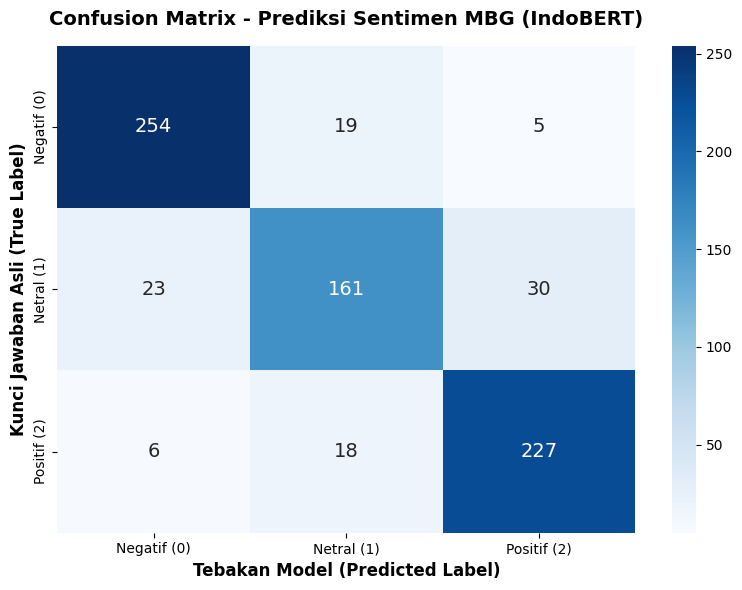

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("Memulai Ujian Evaluasi pada Data Uji")

predictions = trainer.predict(test_dataset)

y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

target_names = ['Negatif (0)', 'Netral (1)', 'Positif (2)']

print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=target_names))

print("\nMembuat Visualisasi Confusion Matrix.")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names,
            annot_kws={"size": 14})

plt.title('Confusion Matrix - Prediksi Sentimen MBG (IndoBERT)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Tebakan Model (Predicted Label)', fontsize=12, fontweight='bold')
plt.ylabel('Kunci Jawaban Asli (True Label)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Berdasarkan pengujian model IndoBERT terhadap 743 data uji (test dataset) yang belum pernah dilihat sebelumnya, model berhasil mencapai Akurasi keseluruhan sebesar 86%. Berikut adalah rincian performa untuk masing-masing kelas sentimen:

1. Sentimen Negatif (0): Memiliki performa tertinggi dengan F1-Score 91%. Hal ini menunjukkan bahwa model sangat akurat dalam mengenali keluhan, kritik, atau penolakan terhadap program MBG. Kosakata negatif cenderung lebih tegas dan mudah dipetakan oleh model.
2. Sentimen Positif (2): Mencatatkan F1-Score yang sangat baik yaitu 88%. Model terbukti handal dalam mengklasifikasikan tweet yang berisi dukungan, apresiasi, atau harapan baik terhadap program MBG.
3. Sentimen Netral (1): Memiliki F1-Score sebesar 78%. Angka yang sedikit lebih rendah pada kelas netral adalah fenomena yang sangat wajar dalam Natural Language Processing (NLP). Teks netral seringkali bersifat ambigu, berisi kalimat berita, atau mencampuradukkan fakta tanpa opini emosional yang kuat, sehingga wajar jika model terkadang sedikit kesulitan membedakannya.

Secara keseluruhan (macro avg), model memiliki keseimbangan Precision, Recall, dan F1-Score di angka 86%. Angka ini membuktikan bahwa model tidak mengalami bias atau berat sebelah terhadap satu kelas tertentu. Model telah berhasil memahami konteks sentimen publik terhadap program Makan Bergizi Gratis dengan sangat optimal.

In [23]:
import os
import shutil
from google.colab import files

folder_simpan = "./model_indobert_mbg"

print("Sedang menyimpan model dan tokenizer")
model.save_pretrained(folder_simpan)
tokenizer.save_pretrained(folder_simpan)
print(f"Berhasil! Model disimpan di dalam folder: {folder_simpan}")

print("Sedang mengkompres file menjadi ZIP agar bisa didownload")
shutil.make_archive("model_indobert_mbg", 'zip', folder_simpan)
print("File ZIP berhasil dibuat! Silakan cek menu 'Files' di sebelah kiri Colab lu.")

Sedang menyimpan model dan tokenizer


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Berhasil! Model disimpan di dalam folder: ./model_indobert_mbg
Sedang mengkompres file menjadi ZIP agar bisa didownload
File ZIP berhasil dibuat! Silakan cek menu 'Files' di sebelah kiri Colab lu.


# Uji Coba

In [24]:
import torch

def tebak_sentimen(teks):
    inputs = tokenizer(teks, return_tensors="pt", truncation=True, padding=True, max_length=128)

    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    prediksi_angka = torch.argmax(logits, dim=1).item()

    label_map = {0: 'NEGATIF', 1: 'NETRAL', 2: 'POSITIF'}

    return label_map[prediksi_angka]

print("LIVE TESTING MODEL INDOBERT MBG")
print("=" * 50)

kalimat_tes = [
    "Wah bagus banget program makan siang gratis ini, anak saya jadi semangat sekolah dan gizinya terjamin!",
    "Buang-buang anggaran aja, mending uangnya dipakai buat perbaiki gedung sekolah yang rusak daripada buat makan.",
    "Pemerintah berencana mengalokasikan dana triliunan rupiah untuk uji coba program MBG di beberapa daerah."
]

for teks in kalimat_tes:
    hasil = tebak_sentimen(teks)
    print(f"Teks     : '{teks}'")
    print(f"Prediksi : {hasil}")
    print("-" * 50)

LIVE TESTING MODEL INDOBERT MBG
Teks     : 'Wah bagus banget program makan siang gratis ini, anak saya jadi semangat sekolah dan gizinya terjamin!'
Prediksi : POSITIF
--------------------------------------------------
Teks     : 'Buang-buang anggaran aja, mending uangnya dipakai buat perbaiki gedung sekolah yang rusak daripada buat makan.'
Prediksi : NEGATIF
--------------------------------------------------
Teks     : 'Pemerintah berencana mengalokasikan dana triliunan rupiah untuk uji coba program MBG di beberapa daerah.'
Prediksi : NEGATIF
--------------------------------------------------
